In [48]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        


In [49]:
train_data = pd.read_csv('F:/Project DA/Credit Risk Model/cs-training.csv')
test_data = pd.read_csv('F:/Project DA/Credit Risk Model/cs-test.csv')

In [50]:
#print columns headers of the dataset
train_data.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [51]:
#drop lines with missing data (NA)
train_data.dropna(axis=1)
cols_with_missing = [col for col in train_data.columns
                         if train_data[col].isnull().any()]
reduced_train_data = train_data.drop(cols_with_missing, axis=1)
reduced_test_data = test_data.drop(cols_with_missing,axis=1)

In [52]:
reduced_train_data.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse'],
      dtype='object')

In [53]:
#specify the target variable
train_y = reduced_train_data.SeriousDlqin2yrs
test_y = reduced_test_data.SeriousDlqin2yrs

In [54]:
#create list of features
feature_names = ['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse']
#create data corresponding to the features
train_X = reduced_train_data[feature_names]
test_X = reduced_test_data[feature_names]

In [55]:
#review data
print(train_X.describe)
print(train_X.head)

<bound method NDFrame.describe of         RevolvingUtilizationOfUnsecuredLines  age  \
0                                   0.766127   45   
1                                   0.957151   40   
2                                   0.658180   38   
3                                   0.233810   30   
4                                   0.907239   49   
...                                      ...  ...   
149995                              0.040674   74   
149996                              0.299745   44   
149997                              0.246044   58   
149998                              0.000000   30   
149999                              0.850283   64   

        NumberOfTime30-59DaysPastDueNotWorse    DebtRatio  \
0                                          2     0.802982   
1                                          0     0.121876   
2                                          1     0.085113   
3                                          0     0.036050   
4                       

In [56]:
#split train data into train and test set. 

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_X, train_y, test_size = 0.3, random_state = 0)

In [57]:
from sklearn.linear_model import LogisticRegression
#specify the model, set any numeric valye as parameter to ensure reproducibility 
credit_model = LogisticRegression(random_state=1, solver='liblinear')

#fit the model
credit_model.fit(x_train,y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [58]:
#make predictions
predictions_train = credit_model.predict(x_train)
y_pred = credit_model.predict(x_test)

In [59]:
#this section investigates resulting data, I had to do this because confusion matrix was throwing errors
print(predictions_train)
print(y_pred)
print(y_pred.shape)
print(y_pred.dtype)
print(y_test.shape)
print(y_test.dtype)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
(45000,)
int64
(45000,)
int64


In [60]:
#conver float to int
y_predi = y_pred.astype(int)

In [61]:
#create confuson matrics in text view
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix( y_test,y_predi).ravel()
(tn, fp, fn, tp)

(41883, 82, 2904, 131)

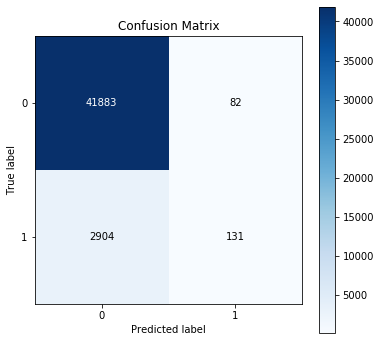

In [62]:
#create consusion matrix and plot
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test,y_predi,figsize=(6,6))

In [63]:
from sklearn import metrics
#calculate ROC
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predi)
print(fpr)
print(fpr.shape)
print(tpr)
print(tpr.shape)
print(thresholds)

[0.         0.00195401 1.        ]
(3,)
[0.        0.0431631 1.       ]
(3,)
[2 1 0]


In [64]:
from sklearn import metrics
#calculate AUC
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

0.5206045439529412


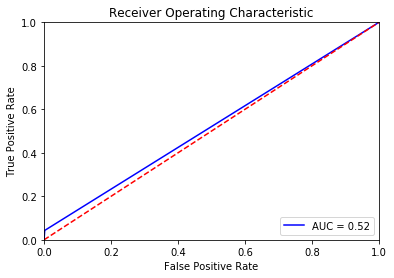

In [65]:
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [66]:
#calculate F1 score
from sklearn.metrics import f1_score
f1_score(y_test, y_predi) #do we need to use average=None as the third param?

0.08066502463054187

In [67]:
#accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predi) #do we need to use normalize=False as the third param?

0.9336444444444445

In [68]:
#precision
from sklearn.metrics import precision_score
precision_score(y_test, y_predi)

0.6150234741784038

In [69]:
#recall
from sklearn.metrics import recall_score
recall_score(y_test, y_predi)

0.04316309719934102

In [70]:
#cost-sensitive accuracy
fp_cost = 1
fn_cost = 0
cost_sensitive_accuracy = (tp + tn) / (tp + tn + fp*fp_cost + fn*fn_cost)
print(cost_sensitive_accuracy)

0.9980520714557203
